In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
data_income=pd.read_csv('income_data1.csv')

In [6]:
print(data_income)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [7]:
data=data_income.copy()
print(data)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [8]:
print(data.isnull().sum())

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [9]:
print(data.describe())

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [10]:
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [11]:
print(np.unique(data['JobType']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [12]:
data=pd.read_csv('income_data1.csv',na_values=[" ?"])

In [13]:
print(data.isnull().sum())

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64


In [14]:
print(data['JobType'].value_counts())

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64


In [15]:
print(data.isnull().sum())

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64


In [16]:
missing=data[data.isnull().any(axis=1)]

In [17]:
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [18]:
data2=data.dropna(axis=0)
data2.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 

In [19]:
correlation=data2.corr()
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


In [20]:
gender=pd.crosstab(index=data2["gender"],
                  columns='count',
                  normalize=True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [21]:
gender_sal_stat=pd.crosstab(index=data2["gender"],
                           columns=data2["SalStat"],
                           margins=True,
                           normalize='index')
print(gender_sal_stat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


AxesSubplot(0.125,0.125;0.775x0.755)


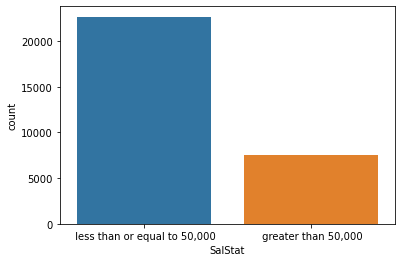

In [22]:
SalStat=sns.countplot(data2['SalStat'])
print(SalStat)

AxesSubplot(0.125,0.125;0.775x0.755)


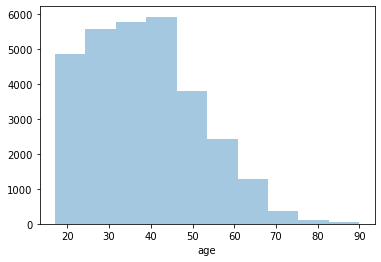

In [23]:
Histogram_of_age=sns.distplot(data2['age'],bins=10,kde=False)
print(Histogram_of_age)

AxesSubplot(0.125,0.125;0.775x0.755)


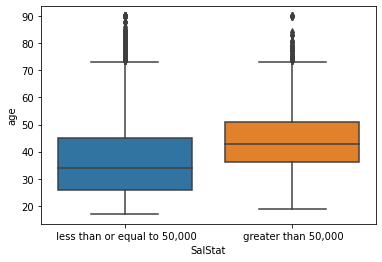

In [24]:
salary_vs_age_boxplot=sns.boxplot('SalStat','age',data=data2)
print(salary_vs_age_boxplot)

In [25]:
gender_sal_stat=pd.crosstab(index=data2["gender"],
                           columns=data2["SalStat"],
                           margins=True,
                           normalize='index')
print(gender_sal_stat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


In [26]:
print(data2['SalStat'])

0         less than or equal to 50,000
1         less than or equal to 50,000
2                  greater than 50,000
3         less than or equal to 50,000
4         less than or equal to 50,000
                     ...              
31973     less than or equal to 50,000
31974     less than or equal to 50,000
31975     less than or equal to 50,000
31976     less than or equal to 50,000
31977     less than or equal to 50,000
Name: SalStat, Length: 30162, dtype: object


In [27]:
print(data2['SalStat'].value_counts())

 less than or equal to 50,000    22654
 greater than 50,000              7508
Name: SalStat, dtype: int64


In [28]:
data2['SalStat']=data['SalStat'].map({" less than or equal to 50,000":0," greater than 50,000":1})

<ipython-input-28-c323d878fe1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data['SalStat'].map({" less than or equal to 50,000":0," greater than 50,000":1})


In [29]:
print(data2['SalStat'].value_counts())

0    22654
1     7508
Name: SalStat, dtype: int64


In [30]:
new_data=pd.get_dummies(data2,drop_first=True)

In [31]:
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [32]:
features=list(set(columns_list)-set(['SalStat']))
print(features)

['EdType_ Assoc-acdm', 'occupation_ Transport-moving', 'gender_ Male', 'nativecountry_ England', 'occupation_ Handlers-cleaners', 'occupation_ Protective-serv', 'relationship_ Other-relative', 'EdType_ 7th-8th', 'nativecountry_ Canada', 'EdType_ Prof-school', 'maritalstatus_ Married-civ-spouse', 'capitalgain', 'nativecountry_ Trinadad&Tobago', 'race_ Black', 'nativecountry_ Puerto-Rico', 'maritalstatus_ Separated', 'nativecountry_ Philippines', 'nativecountry_ Yugoslavia', 'EdType_ 11th', 'nativecountry_ Japan', 'nativecountry_ Thailand', 'JobType_ State-gov', 'nativecountry_ India', 'nativecountry_ Jamaica', 'EdType_ 9th', 'EdType_ 12th', 'nativecountry_ El-Salvador', 'maritalstatus_ Widowed', 'nativecountry_ Guatemala', 'nativecountry_ Iran', 'JobType_ Local-gov', 'occupation_ Sales', 'maritalstatus_ Never-married', 'nativecountry_ Italy', 'nativecountry_ Germany', 'EdType_ Preschool', 'JobType_ Private', 'occupation_ Farming-fishing', 'nativecountry_ China', 'EdType_ Masters', 'nati

In [33]:
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [34]:
x=new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [35]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [36]:
logistic=LogisticRegression()

In [37]:
logistic.fit(train_x,train_y)

C:\Users\ajay yadav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
print(logistic.coef_)

[[-5.97308016e-02 -1.95601929e-01  1.63601960e-01  1.27029366e-02
  -3.39355215e-01 -1.42812100e-02 -2.44629279e-01 -2.50498792e-01
   3.59099604e-03  2.34135290e-01  1.13053047e+00  3.15785390e-04
  -4.49412484e-03 -4.33917643e-01 -4.14361430e-02 -1.79376101e-01
  -8.24899614e-03 -5.27782453e-04 -3.04661229e-01 -4.85833096e-04
  -3.34744000e-03 -1.27121126e-01 -2.03666063e-02 -1.19806003e-02
  -1.72628110e-01 -9.58821568e-02 -3.97181538e-02 -9.73657795e-02
  -2.17775120e-02 -2.72120822e-03 -2.48734203e-01  9.85807035e-02
  -1.34534525e+00 -1.88433786e-03  1.45530545e-02 -2.64003453e-02
  -3.23213179e-01 -3.90857966e-01 -2.25027040e-02  5.26974399e-01
  -3.88479493e-03 -4.24023264e-01  6.73004425e-04 -1.40534234e-01
  -9.34925802e-01 -1.29026672e-02 -7.17785709e-02 -3.37460295e-02
  -8.91952708e-04 -8.41029625e-02  5.71720511e-03 -4.97591382e-01
  -2.24776192e-03  3.60316093e-04  1.61383794e-01  1.17326224e-01
  -3.27757110e-03 -3.50847407e-01  1.65346135e-02  1.93773371e-03
  -9.36647

In [39]:
print(logistic.intercept_)

[-1.04087004]


In [40]:
prediction=logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [41]:
confusion_matrix=confusion_matrix(test_y,prediction)
print(confusion_matrix)

[[6293  530]
 [ 947 1279]]


In [42]:
accuracy_score=accuracy_score(test_y,prediction)
print(accuracy_score)

0.836777544480053


In [43]:
mispredict=((test_y!=prediction).sum())
print(mispredict)

1477


In [44]:
count=0;
for i in range(0,len(test_y)):
    if test_y[i]!=prediction[i]:
        count=count+1;

In [55]:
print(count)

1478
